In [1]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import csv

In [2]:
# csv permits file
csv_city_permits = "output_data/texas_permits.csv"

# create df from csv, clean and display first rows
city_permits = pd.read_csv(csv_city_permits)
city_permits = city_permits.rename(columns={"area":"city"})
city_permits.head()

,city,year,total permits
0,"Abilene, TX",2007,293
1,"Abilene, TX",2008,196
2,"Abilene, TX",2009,214
3,"Abilene, TX",2010,390
4,"Abilene, TX",2011,159


In [3]:
# csv population file
csv_city_pop = "output_data/texas_population.csv"

# create df from csv, clean and display first rows
city_pop = pd.read_csv(csv_city_pop)
city_pop = city_pop.rename(columns={"area":"city"})
city_pop.head()

,city,year,population
0,"Abilene, TX",2007,162023
1,"Abilene, TX",2008,162508
2,"Abilene, TX",2009,163888
3,"Abilene, TX",2010,165252
4,"Abilene, TX",2011,166633


In [4]:
# csv unemployment file
csv_city_unemployment = "output_data/texas_unemployment.csv"

# create df from csv, clean and display first rows
city_unemployment = pd.read_csv(csv_city_unemployment)
city_unemployment = city_unemployment.rename(columns={"area":"city"})
city_unemployment.head()

,city,year,unemployment
0,"Abilene, TX",2007,3.5373
1,"Abilene, TX",2008,3.7812
2,"Abilene, TX",2009,5.8180
3,"Abilene, TX",2010,6.9720
4,"Abilene, TX",2011,6.7516


In [5]:
# csv crime file
csv_city_crime = "output_data/texas_crime_data.csv"

# create df from csv, clean and display first rows
city_crime = pd.read_csv(csv_city_crime)
city_crime = city_crime.rename(columns={"City":"city", "Year": "year", "Crime": "crime"})
city_crime = city_crime.drop("Unnamed: 0", axis = 1)
city_crime.head()

,city,year,crime
0,"Austin-Round Rock, TX",2007,3983.0
1,"Austin-Round Rock, TX",2008,4063.0
2,"Austin-Round Rock, TX",2009,4152.0
3,"Austin-Round Rock, TX",2010,3906.0
4,"Austin-Round Rock, TX",2011,3586.0


In [6]:
# merge permits and population DataFrames
permits_population = pd.merge(city_pop,city_permits,on=["city","year"])
permits_population["population"].max()
permits_population.head()

,city,year,population,total permits
0,"Abilene, TX",2007,162023,293
1,"Abilene, TX",2008,162508,196
2,"Abilene, TX",2009,163888,214
3,"Abilene, TX",2010,165252,390
4,"Abilene, TX",2011,166633,159


In [7]:
# merge combined and unemployemnt DataFrames
perm_pop_unemploy = pd.merge(permits_population,city_unemployment,on=["city","year"])
perm_pop_unemploy.head()

,city,year,population,total permits,unemployment
0,"Abilene, TX",2007,162023,293,3.5373
1,"Abilene, TX",2008,162508,196,3.7812
2,"Abilene, TX",2009,163888,214,5.8180
3,"Abilene, TX",2010,165252,390,6.9720
4,"Abilene, TX",2011,166633,159,6.7516


In [8]:
# Top 10 cities in our DF

# create new df with top 10 cities
top_10_df = perm_pop_unemploy.groupby('city', as_index=False)['population'].mean()
top_10_df = top_10_df.nlargest(10, 'population')

# list out top 10 cities
top_10_list = list(top_10_df["city"].unique()) 
combined_top_10 = perm_pop_unemploy[perm_pop_unemploy["city"].isin(top_10_df["city"].unique())]
combined_top_10.head()

,city,year,population,total permits,unemployment
22,"Austin-Round Rock, TX",2007,1577856,19903,3.6494
23,"Austin-Round Rock, TX",2008,1633870,11792,4.3054
24,"Austin-Round Rock, TX",2009,1682338,8758,6.9079
25,"Austin-Round Rock, TX",2010,1716289,8786,6.9947
26,"Austin-Round Rock, TX",2011,1780610,10239,6.5936


In [9]:
# Add crime data to top 10 cities
top_10_final = pd.merge(combined_top_10, city_crime, on=["city","year"])
top_10_final.head()

,city,year,population,total permits,unemployment,crime
0,"Austin-Round Rock, TX",2007,1577856,19903,3.6494,3983.0
1,"Austin-Round Rock, TX",2008,1633870,11792,4.3054,4063.0
2,"Austin-Round Rock, TX",2009,1682338,8758,6.9079,4152.0
3,"Austin-Round Rock, TX",2010,1716289,8786,6.9947,3906.0
4,"Austin-Round Rock, TX",2011,1780610,10239,6.5936,3586.0


In [10]:
# Create a new DF with percentage change
top_10_final['population % change'] = ((top_10_final["population"] - top_10_final["population"].shift(+1)) / top_10_final["population"].shift(+1)).round(4)*100
top_10_final['total permits % change'] = ((top_10_final["total permits"] - top_10_final["total permits"].shift(+1)) / top_10_final["total permits"].shift(+1)).round(4)*100
top_10_final["crime rate"] = round(top_10_final["population"] / top_10_final["crime"])
top_10_final.head()


,city,year,population,total permits,unemployment,crime,population % change,total permits % change,crime rate
0,"Austin-Round Rock, TX",2007,1577856,19903,3.6494,3983.0,NaN,NaN,396.0
1,"Austin-Round Rock, TX",2008,1633870,11792,4.3054,4063.0,3.55,-40.75,402.0
2,"Austin-Round Rock, TX",2009,1682338,8758,6.9079,4152.0,2.97,-25.73,405.0
3,"Austin-Round Rock, TX",2010,1716289,8786,6.9947,3906.0,2.02,0.32,439.0
4,"Austin-Round Rock, TX",2011,1780610,10239,6.5936,3586.0,3.75,16.54,497.0


In [11]:
# drop all rows with year 2007
top_10_final = top_10_final[top_10_final.year != 2007]
top_10_final.head()

,city,year,population,total permits,unemployment,crime,population % change,total permits % change,crime rate
1,"Austin-Round Rock, TX",2008,1633870,11792,4.3054,4063.0,3.55,-40.75,402.0
2,"Austin-Round Rock, TX",2009,1682338,8758,6.9079,4152.0,2.97,-25.73,405.0
3,"Austin-Round Rock, TX",2010,1716289,8786,6.9947,3906.0,2.02,0.32,439.0
4,"Austin-Round Rock, TX",2011,1780610,10239,6.5936,3586.0,3.75,16.54,497.0
5,"Austin-Round Rock, TX",2012,1834566,19595,5.6770,3546.0,3.03,91.38,517.0


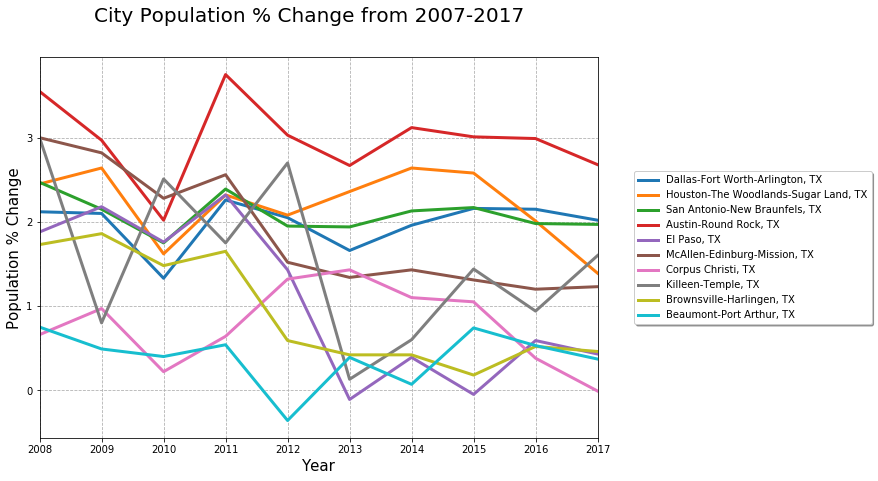

In [12]:
# Plot population percentage change
plt.figure(figsize = (10, 7))

for city in top_10_list:
    plot_df = top_10_final.loc[top_10_final["city"] == city]
    x = plot_df["year"]
    y = plot_df["population % change"]
    plt.plot(x, y, label = city, linewidth = 3)
    plt.xlim(plot_df.year.min(), plot_df.year.max(), 1)
    plt.legend(loc='right', bbox_to_anchor=(1.5, .5), shadow=True)

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Population % Change", fontsize = 15)
plt.suptitle("City Population % Change from 2007-2017", fontsize = 20)
plt.grid(linestyle = "--")
plt.savefig("images/population.png", bbox_inches='tight')
plt.show()

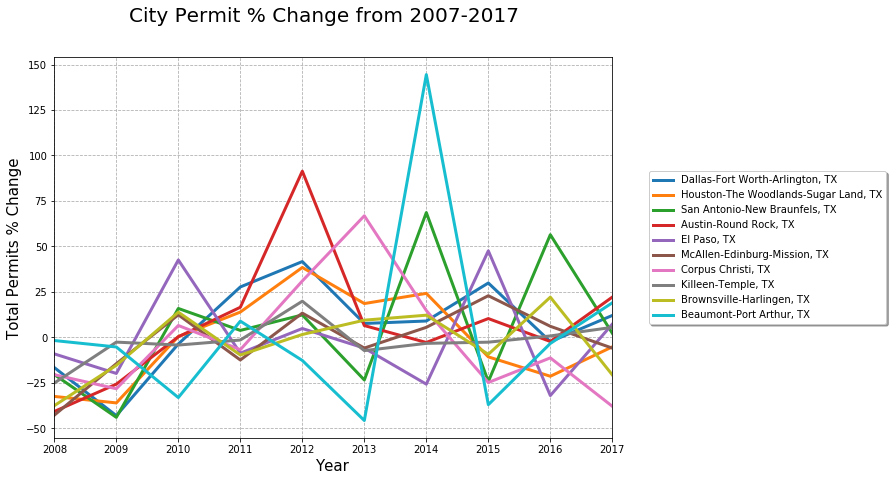

In [13]:
# Plot total permits percentage change
plt.figure(figsize = (10, 7))

for city in top_10_list:
    plot_df = top_10_final.loc[top_10_final["city"] == city]
    x = plot_df["year"]
    y = plot_df["total permits % change"]
    plt.plot(x, y, label = city, linewidth = 3)
    plt.xlim(plot_df.year.min(), plot_df.year.max(), 1)
    plt.legend(loc='right', bbox_to_anchor=(1.5, .5), shadow=True)

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Permits % Change", fontsize = 15)
plt.suptitle("City Permit % Change from 2007-2017", fontsize = 20)
plt.grid(linestyle = "--")
plt.savefig("images/permit.png", bbox_inches='tight')
plt.show()

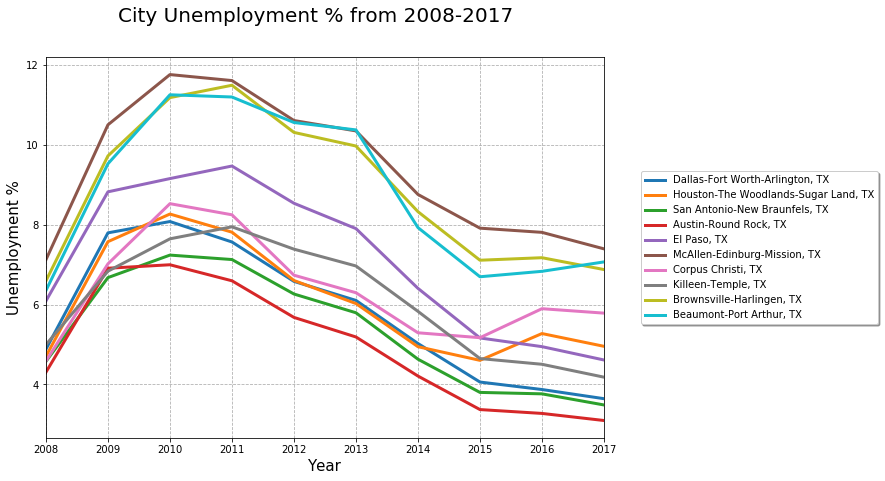

In [14]:
# Plot Unemployment change
plt.figure(figsize = (10, 7))

for city in top_10_list:
    plot_df = top_10_final.loc[top_10_final["city"] == city]
    x = plot_df["year"]
    y = plot_df["unemployment"]
    plt.plot(x, y, label = city, linewidth = 3)
    plt.xlim(plot_df.year.min(), plot_df.year.max(), 1)
    plt.legend(loc='right', bbox_to_anchor=(1.5, .5), shadow=True)

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Unemployment %", fontsize = 15)
plt.suptitle("City Unemployment % from 2008-2017", fontsize = 20)
plt.grid(linestyle = "--")
plt.savefig("images/unemployment.png", bbox_inches='tight')
plt.show()

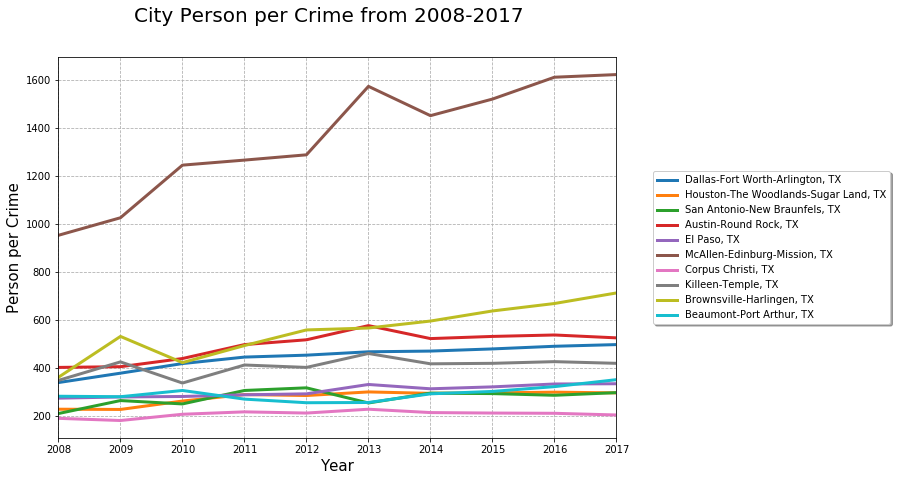

In [15]:
# Plot Crime Rate
plt.figure(figsize = (10, 7))

for city in top_10_list:
    plot_df = top_10_final.loc[top_10_final["city"] == city]
    x = plot_df["year"]
    y = plot_df["crime rate"]
    plt.plot(x, y, label = city, linewidth = 3)
    plt.xlim(plot_df.year.min(), plot_df.year.max(), 1)
    plt.legend(loc='right', bbox_to_anchor=(1.5, .5), shadow=True)    

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Person per Crime", fontsize = 15)
plt.suptitle("City Person per Crime from 2008-2017", fontsize = 20)
plt.grid(linestyle = "--")
plt.savefig("images/crime.png", bbox_inches='tight')
plt.show()